# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


In [26]:
image_size = (120,500)

***

In [48]:
from pykitPIV import Particle, Image, FlowField

particles = Particle(1, 
                     size=image_size, 
                     size_buffer=20,
                     diameters=(6,10),
                     distances=(1,2),
                     densities=(0.001,0.002),
                     signal_to_noise=(5,20),
                     diameter_std=1,
                     seeding_mode='random', 
                     random_seed=100)

In [49]:
particles.size_with_buffer

(160, 540)

In [56]:
image = Image(size=image_size, 
              random_seed=100)

In [57]:
image.add_particles(particles)

Particles added to the image.


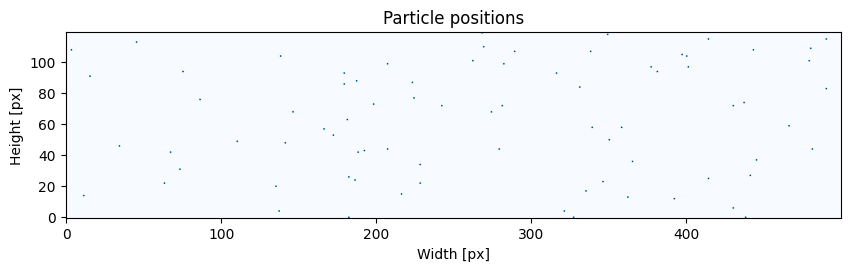

In [58]:
image.plot(0, 
           with_buffer=False,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Blues',
           figsize=(10,3), 
           filename='particle-positions.png');

In [65]:
image.add_reflected_light(exposures=(0.02,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.7,
                          alpha=1/20)

Reflected light added to the image.


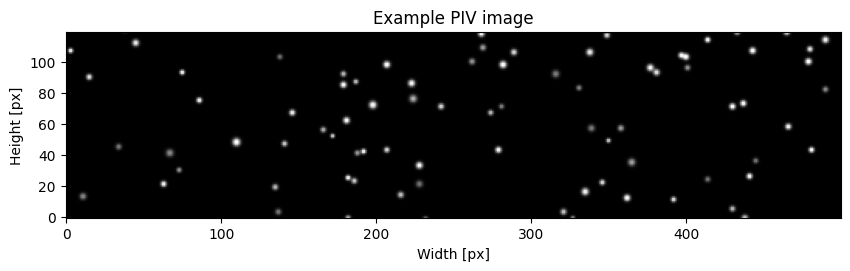

In [66]:
image.plot(0, 
           with_buffer=False,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=(10,3), 
           filename='example-image.png');

In [18]:
flowfield = FlowField(5,
                      size=image_size,
                      flow_mode='random',
                      gaussian_filters=(8,10),
                      n_gaussian_filter_iter=10,
                      sin_period=(30,300),
                      displacement=(0,10),
                      lost_particles_percentage=10,
                      random_seed=100)

In [ ]:
image.add_velocity_field(flowfield)

In [ ]:
image.plot_velocity_field(1,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          vmin_vmax=(-3,3),
                          figsize=(10,2),
                          filename='example-random-velocity-field.png');

In [ ]:
image.plot_velocity_field_magnitude(1,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    # add_streamplot=True,
                                    # streamplot_density=1,
                                    # streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=(10,2),
                                    filename='example-random-velocity-field-magnitude.png');

***